<a href="https://colab.research.google.com/github/Rakesh0019/genAI-lab-ai-er-01-2026/blob/main/gen_ai_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("die9origephit/human-activity-recognition")

print("Path to dataset files:", path)

100%|██████████| 10.4M/10.4M [00:00<00:00, 11.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/die9origephit/human-activity-recognition/versions/6


In [4]:
import numpy as np
import pandas as pd


window_size = 100  # Number of samples in each window
step_size = 50   # Number of samples to step for the next window (overlap if step_size < window_size)


segmented_data = []

# Iterate through each user and activity group to ensure windows don't cross boundaries
for (user, activity), group in df.groupby(['user', 'activity']):
    # Apply sliding window
    for i in range(0, len(group) - window_size + 1, step_size):
        window = group.iloc[i : i + window_size]

        # Extract features from the window
        features = {
            'user': user,
            'activity': activity,
            'x_mean': window['x-axis'].mean(),
            'y_mean': window['y-axis'].mean(),
            'z_mean': window['z-axis'].mean(),
            'x_std': window['x-axis'].std(),
            'y_std': window['y-axis'].std(),
            'z_std': window['z-axis'].std()

        }
        segmented_data.append(features)

# Convert the list of dictionaries to a DataFrame
segmented_df = pd.DataFrame(segmented_data)

print(f"Original DataFrame shape: {df.shape}")
print(f"Segmented DataFrame shape: {segmented_df.shape}")
print("\nFirst 5 rows of the segmented DataFrame:")
print(segmented_df.head())

Original DataFrame shape: (1073623, 6)
Segmented DataFrame shape: (21207, 8)

First 5 rows of the segmented DataFrame:
   user    activity  x_mean  y_mean  z_mean     x_std     y_std     z_std
0     1  Downstairs -1.9198  9.8526  2.0741  3.490329  4.374486  4.537769
1     1  Downstairs -3.5880  9.4871  1.2552  4.516131  4.728443  4.986821
2     1  Downstairs -6.8752  7.9610  0.7052  5.224604  4.932994  4.128162
3     1  Downstairs -8.5539  6.1994  0.9306  5.432367  5.230608  3.669130
4     1  Downstairs -8.7026  5.4105  0.8885  5.008284  5.075282  3.488765


In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('/root/.cache/kagglehub/datasets/die9origephit/human-activity-recognition/versions/6/time_series_data_human_activities.csv')

print(df.columns)
df.info()



Index(['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073623 entries, 0 to 1073622
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1073623 non-null  int64  
 1   activity   1073623 non-null  object 
 2   timestamp  1073623 non-null  int64  
 3   x-axis     1073623 non-null  float64
 4   y-axis     1073623 non-null  float64
 5   z-axis     1073623 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.1+ MB


In [4]:
window_size = 128  # Number of samples in each window
step_size = 64   # Number of samples to step for the next window (overlap if step_size < window_size)

X_raw_windows = []
y_labels = []

# Iterate through each user and activity group
for (user, activity), group in df.groupby(['user', 'activity']):
    # Apply sliding window
    for i in range(0, len(group) - window_size + 1, step_size):
        window_data = group.iloc[i : i + window_size][['x-axis', 'y-axis', 'z-axis']].values
        X_raw_windows.append(window_data)
        y_labels.append(activity)

# Convert the lists to NumPy arrays
X_raw_windows = np.array(X_raw_windows)
y_labels = np.array(y_labels)

print(f"Shape of X_raw_windows: {X_raw_windows.shape}")
print(f"Shape of y_labels: {y_labels.shape}")

print("\nFirst 5 samples of the first raw window:")
print(X_raw_windows[0, :5])
print("\nFirst 5 activity labels:")
print(y_labels[:5])

Shape of X_raw_windows: (16507, 128, 3)
Shape of y_labels: (16507,)

First 5 samples of the first raw window:
[[-0.15  9.15 -0.34]
 [ 0.11  9.19  2.76]
 [-4.06  7.4   4.02]
 [-2.87  7.93  3.21]
 [-0.19 10.04  4.82]]

First 5 activity labels:
['Downstairs' 'Downstairs' 'Downstairs' 'Downstairs' 'Downstairs']


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the activity labels
y_encoded = label_encoder.fit_transform(y_labels)

# Print unique original activity labels and their encoded values
print("Original activity labels:", label_encoder.classes_)
print("Encoded numerical labels (unique values):", np.unique(y_encoded))


y_labels = y_encoded

print(f"\nShape of updated y_labels: {y_labels.shape}")
print(f"First 5 encoded activity labels: {y_labels[:5]}")

Original activity labels: ['Downstairs' 'Jogging' 'Sitting' 'Standing' 'Upstairs' 'Walking']
Encoded numerical labels (unique values): [0 1 2 3 4 5]

Shape of updated y_labels: (16507,)
First 5 encoded activity labels: [0 0 0 0 0]


In [6]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_raw_windows, y_labels, test_size=0.2, stratify=y_labels, random_state=42
)

# Print the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (13205, 128, 3)
Shape of X_test: (3302, 128, 3)
Shape of y_train: (13205,)
Shape of y_test: (3302,)


In [7]:
import math

# 1. Input dimensions for 1D CNN
in_channels = X_train.shape[2] # Number of features (x, y, z)
sequence_length = X_train.shape[1] # Window size

# 2. Assume parameters for Conv1d
out_channels_conv = 64
kernel_size_conv = 5
stride_conv = 1
padding_conv = 0

# 3. Calculate output sequence length after Conv1d layer
# L_out = floor((L_in + 2*padding - kernel_size) / stride) + 1
L_out_conv = math.floor((sequence_length + 2 * padding_conv - kernel_size_conv) / stride_conv) + 1

# 4. Assume parameters for MaxPool1d layer
kernel_size_pool = 2
stride_pool = 2 # Default stride for MaxPool1d is kernel_size

# Calculate output sequence length after MaxPool1d layer
# L_out = floor((L_in_conv - kernel_size) / stride) + 1
L_out_pool = math.floor((L_out_conv - kernel_size_pool) / stride_pool) + 1

# 5. Calculate some_length_after_pooling
some_length_after_pooling = out_channels_conv * L_out_pool

# 6. Determine num_classes
num_classes = len(label_encoder.classes_)

# 7. Print the calculated values
print(f"Calculated some_length_after_pooling: {some_length_after_pooling}")
print(f"Number of classes (num_classes): {num_classes}")

Calculated some_length_after_pooling: 3968
Number of classes (num_classes): 6


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class OneD_CNN(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, some_length_after_pooling, num_classes, stride=1, padding=0):
        super(OneD_CNN, self).__init__()

        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding)

        self.pool = nn.MaxPool1d(kernel_size=2)

        self.fc1 = nn.Linear(out_channels * some_length_after_pooling, num_classes)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))

        x = torch.flatten(x, 1)
        x = self.fc1(x)
        return x



# Ensure in_channels is consistent with X_train.shape[2]
in_channels_model = X_train.shape[2]

# Instantiate the model
model = OneD_CNN(
    in_channels=in_channels_model,
    out_channels=out_channels_conv,
    kernel_size=kernel_size_conv,
    some_length_after_pooling=L_out_pool,
    num_classes=num_classes
)

# Print the model architecture
print(model)

OneD_CNN(
  (conv1): Conv1d(3, 64, kernel_size=(5,), stride=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3968, out_features=6, bias=True)
)


In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


print("Criterion:", criterion)
print("Optimizer:", optimizer)

Criterion: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [38]:
import torch
from torch.utils.data import TensorDataset, DataLoader


X_train_tensor = torch.from_numpy(X_train).float().permute(0, 2, 1)
X_test_tensor = torch.from_numpy(X_test).float().permute(0, 2, 1)

# y_train, y_test
y_train_tensor = torch.from_numpy(y_train).long()
y_test_tensor = torch.from_numpy(y_test).long()

print(f"Shape of X_train_tensor: {X_train_tensor.shape}")
print(f"Shape of y_train_tensor: {y_train_tensor.shape}")
print(f"Shape of X_test_tensor: {X_test_tensor.shape}")
print(f"Shape of y_test_tensor: {y_test_tensor.shape}")


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Number of batches in training data: {len(train_loader)}")
print(f"Number of batches in testing data: {len(test_loader)}")


epochs = 10


training_losses = []


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"Using device: {device}")

print("\nStarting training...")
for epoch in range(epochs):
    model.train()
    current_epoch_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        current_epoch_loss += loss.item()

    # Calculate average loss for the epoch
    avg_epoch_loss = current_epoch_loss / len(train_loader)
    training_losses.append(avg_epoch_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_epoch_loss:.4f}")

print("Training complete!")

Shape of X_train_tensor: torch.Size([13205, 3, 128])
Shape of y_train_tensor: torch.Size([13205])
Shape of X_test_tensor: torch.Size([3302, 3, 128])
Shape of y_test_tensor: torch.Size([3302])
Number of batches in training data: 206
Number of batches in testing data: 52
Using device: cpu

Starting training...
Epoch [1/10], Loss: 0.9673
Epoch [2/10], Loss: 0.4466
Epoch [3/10], Loss: 0.3502
Epoch [4/10], Loss: 0.2906
Epoch [5/10], Loss: 0.2446
Epoch [6/10], Loss: 0.2082
Epoch [7/10], Loss: 0.1672
Epoch [8/10], Loss: 0.1620
Epoch [9/10], Loss: 0.1475
Epoch [10/10], Loss: 0.1302
Training complete!


In [10]:
import torch
from torch.utils.data import TensorDataset, DataLoader


X_train_tensor = torch.from_numpy(X_train).float().permute(0, 2, 1)
X_test_tensor = torch.from_numpy(X_test).float().permute(0, 2, 1)

# y_train, y_test
y_train_tensor = torch.from_numpy(y_train).long()
y_test_tensor = torch.from_numpy(y_test).long()

print(f"Shape of X_train_tensor: {X_train_tensor.shape}")
print(f"Shape of y_train_tensor: {y_train_tensor.shape}")
print(f"Shape of X_test_tensor: {X_test_tensor.shape}")
print(f"Shape of y_test_tensor: {y_test_tensor.shape}")


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Number of batches in training data: {len(train_loader)}")
print(f"Number of batches in testing data: {len(test_loader)}")


epochs = 10


training_losses = []


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"Using device: {device}")

print("\nStarting training...")
for epoch in range(epochs):
    model.train()
    current_epoch_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        current_epoch_loss += loss.item()

    # Calculate average loss for the epoch
    avg_epoch_loss = current_epoch_loss / len(train_loader)
    training_losses.append(avg_epoch_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_epoch_loss:.4f}")

print("Training complete!")

Shape of X_train_tensor: torch.Size([13205, 3, 128])
Shape of y_train_tensor: torch.Size([13205])
Shape of X_test_tensor: torch.Size([3302, 3, 128])
Shape of y_test_tensor: torch.Size([3302])
Number of batches in training data: 206
Number of batches in testing data: 52
Using device: cuda

Starting training...
Epoch [1/10], Loss: 0.9914
Epoch [2/10], Loss: 0.4555
Epoch [3/10], Loss: 0.3473
Epoch [4/10], Loss: 0.3132
Epoch [5/10], Loss: 0.2392
Epoch [6/10], Loss: 0.2085
Epoch [7/10], Loss: 0.1676
Epoch [8/10], Loss: 0.1385
Epoch [9/10], Loss: 0.1346
Epoch [10/10], Loss: 0.1533
Training complete!


Accuracy on the test set: 90.40%

Classification Report:
              precision    recall  f1-score   support

  Downstairs       0.67      0.67      0.67       303
     Jogging       0.98      0.96      0.97      1006
     Sitting       0.99      0.91      0.95       180
    Standing       0.99      1.00      0.99       144
    Upstairs       0.70      0.74      0.72       374
     Walking       0.95      0.95      0.95      1295

    accuracy                           0.90      3302
   macro avg       0.88      0.87      0.87      3302
weighted avg       0.91      0.90      0.90      3302



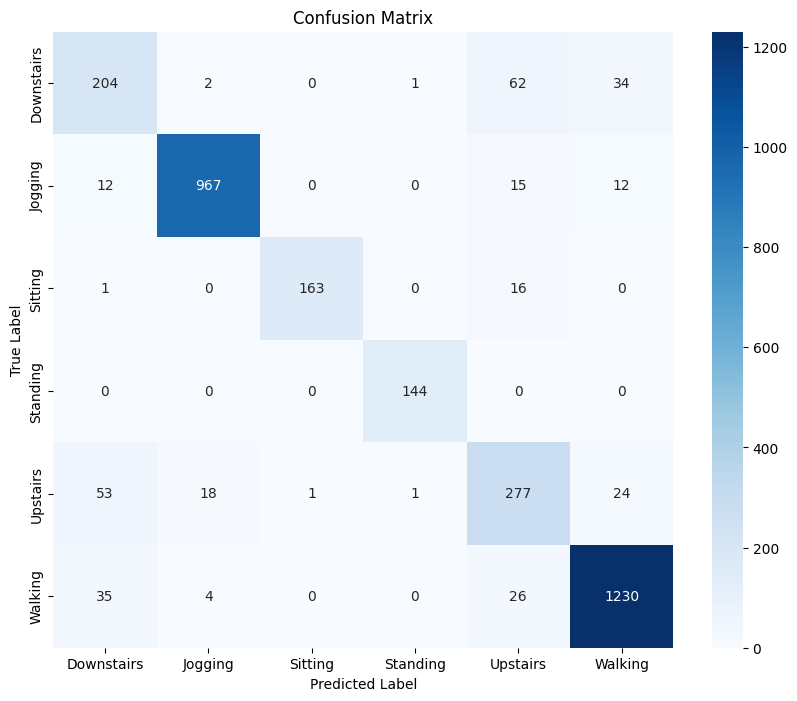

In [39]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Initialize variables for tracking correct predictions and total samples
correct = 0
total = 0

# Initialize lists to store predictions and true labels for classification report
all_predictions = []
all_true_labels = []

# Disable gradient calculation during evaluation
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Get predicted class (index with max probability)
        _, predicted = torch.max(outputs.data, 1)

        # Update total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Store predictions and true labels
        all_predictions.extend(predicted.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Calculate and print overall accuracy
accuracy = 100 * correct / total
print(f"Accuracy on the test set: {accuracy:.2f}%")

# Calculate and print precision, recall, and F1-score
# label_encoder.classes_ contains the original string labels
report = classification_report(all_true_labels, all_predictions, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(report)

# Generate Confusion Matrix
cm = confusion_matrix(all_true_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy on the test set: 89.79%

Classification Report:
              precision    recall  f1-score   support

  Downstairs       0.58      0.77      0.66       303
     Jogging       0.98      0.93      0.95      1006
     Sitting       0.99      1.00      1.00       180
    Standing       1.00      1.00      1.00       144
    Upstairs       0.73      0.69      0.71       374
     Walking       0.96      0.94      0.95      1295

    accuracy                           0.90      3302
   macro avg       0.87      0.89      0.88      3302
weighted avg       0.91      0.90      0.90      3302



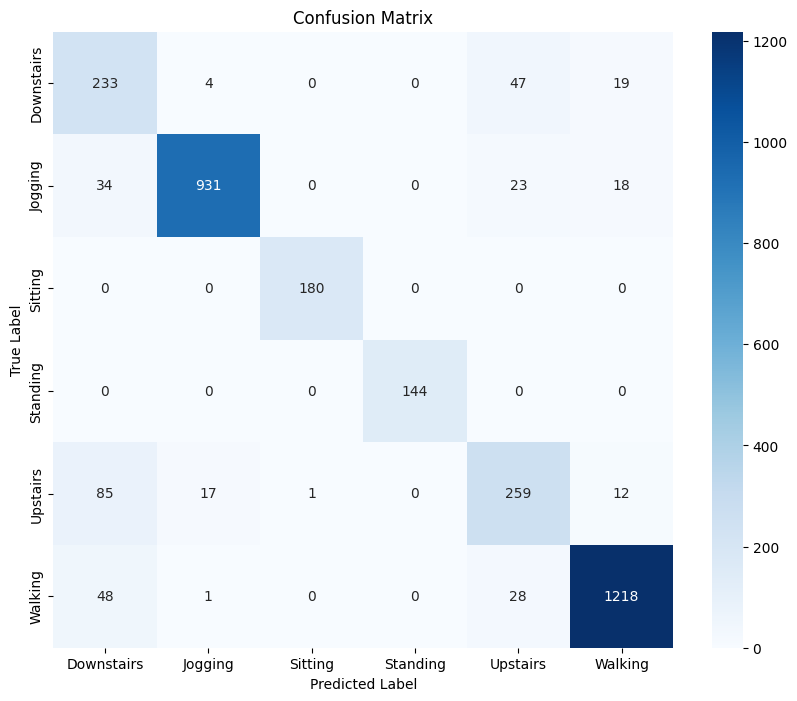

In [11]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Initialize variables for tracking correct predictions and total samples
correct = 0
total = 0

# Initialize lists to store predictions and true labels for classification report
all_predictions = []
all_true_labels = []

# Disable gradient calculation during evaluation
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Get predicted class (index with max probability)
        _, predicted = torch.max(outputs.data, 1)

        # Update total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Store predictions and true labels
        all_predictions.extend(predicted.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Calculate and print overall accuracy
accuracy = 100 * correct / total
print(f"Accuracy on the test set: {accuracy:.2f}%")

# Calculate and print precision, recall, and F1-score
# label_encoder.classes_ contains the original string labels
report = classification_report(all_true_labels, all_predictions, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(report)

# Generate Confusion Matrix
cm = confusion_matrix(all_true_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()